In [1]:
from __future__ import print_function, unicode_literals, absolute_import, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import os
import glob
from tifffile import imread
from csbdeep.utils import download_and_extract_zip_file, plot_some
from csbdeep.data import RawData, create_patches
from tqdm import tqdm


In [5]:
raw_data = RawData.from_folder (
    basepath    = '/data/u934/service_imagerie/v_kapoor/from_Ozge_for_curvature/multiple_cells/',
    source_dirs = ['images'],
    target_dir  = 'masks',
    axes        = 'YX',
)




In [6]:

save_file       = '/data/u934/service_imagerie/v_kapoor/StarDistTraining/EmbryoUnetSegmentation.npz'

In [8]:

X, Y, XY_axes = create_patches (
    raw_data            = raw_data,
   
    patch_size          = (256,256),
    n_patches_per_image = 100,
    save_file           = save_file,
)


  129 raw images x    1 transformations   =   129 images
  129 images     x  100 patches per image = 12900 patches in total
Input data:
/data/u934/service_imagerie/v_kapoor/from_Ozge_for_curvature/multiple_cells/: target='masks', sources=['images'], axes='YX', pattern='*.tif*'
Transformations:
1 x Identity
Patch size:
256 x 256




  0%|          | 0/129 [00:00<?, ?it/s]

  1%|          | 1/129 [00:00<00:46,  2.75it/s]

ValueError: not a TIFF file

In [6]:
assert X.shape == Y.shape
print("shape of X,Y =", X.shape)
print("axes  of X,Y =", XY_axes)

shape of X,Y = (44700, 1, 64, 64)
axes  of X,Y = SCYX


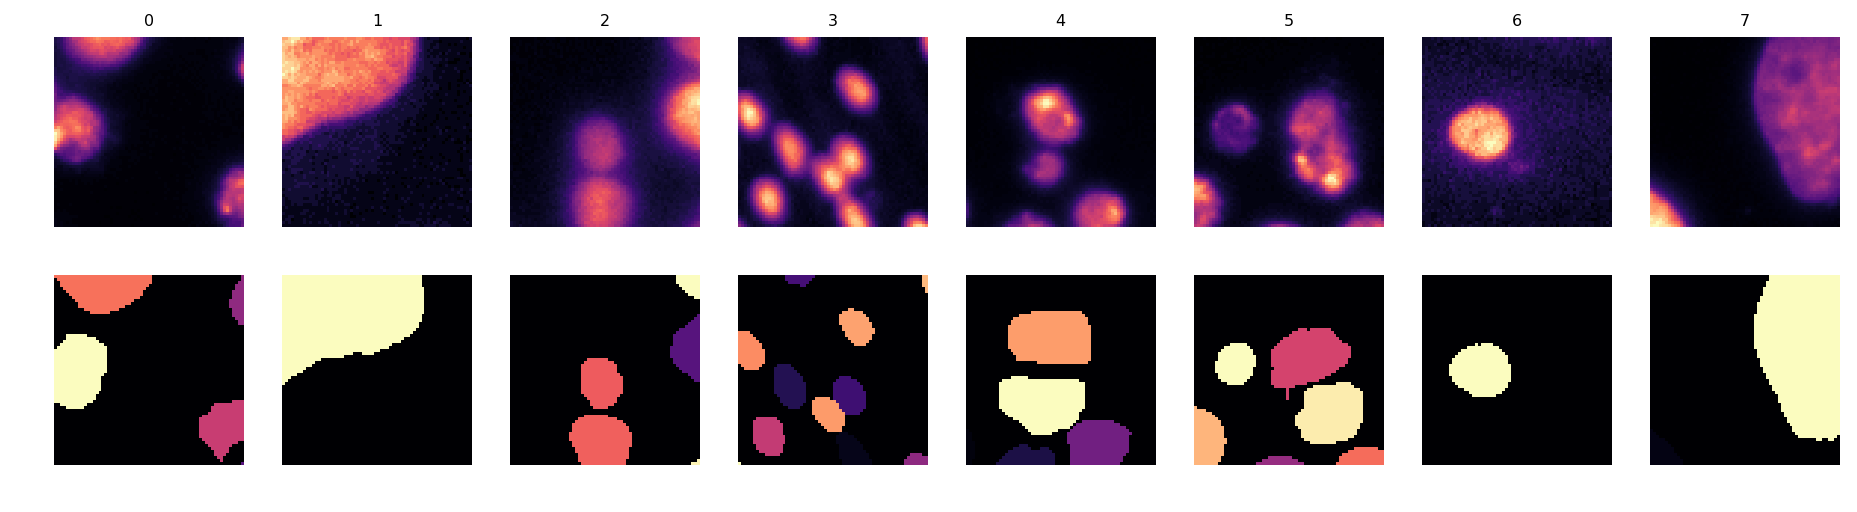

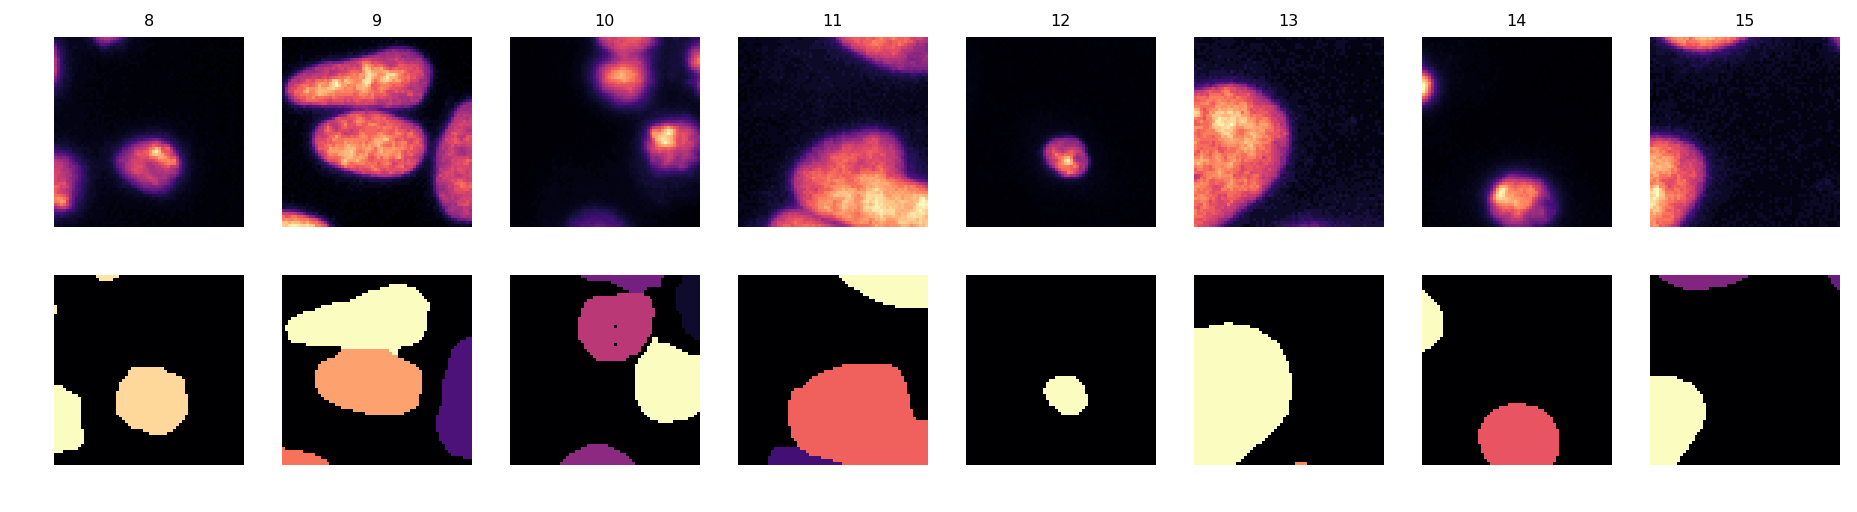

In [7]:
for i in range(2):
    plt.figure(figsize=(16,4))
    sl = slice(8*i, 8*(i+1)), 0
    plot_some(X[sl],Y[sl],title_list=[np.arange(sl[0].start,sl[0].stop)])
    plt.show()
None;